In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np
import string
import matplotlib
import random

from matplotlib.collections import PathCollection
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import ScalarFormatter

random.seed(42)

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

grid_grey = "#e0e0e0"
grey = "#BDBDBD"
border_width = 0.5
threshold_line_width = .75
linewidth = 6.202 # linewidth from latex document


ts_green = "#3D8F24"
ts_purple = "#6E38CC"

sns.set_context("paper", rc={"font.size": 8,
                             "axes.labelsize": 8,
                             "xtick.labelsize": 8,
                             "ytick.labelsize": 8,
                             "legend.fontsize": 8,
                             "legend.title_fontsize": 8,
                             "axes.linewidth": border_width}) 

In [2]:
def circled(x):
    return chr(0x245F+x)

In [97]:
df = pd.read_csv("microhomologies.tsv", delimiter="\t")

homology_12 = list(df["homology_12"])
homology_34 = list(df["homology_34"])
label_12 = ["{} to {}".format(circled(1), circled(2))] * len(homology_12)
label_34 = ["{} to {}".format(circled(3), circled(4))] * len(homology_34)
homs = homology_12 + homology_34
labs = label_12 + label_34

hom_dic = {"homs": homs,
           "label": labs}

df_2 = pd.DataFrame.from_dict(hom_dic)

df = df.sort_values("len_23")

bins = [0, 15, 30, 45, np.inf]
names = ["≤15", '16-30', '31-45', '>45']

df["len_23_bin"] = pd.cut(df["len_23"], bins, labels=names)

df.head()

homology_12  homology_34  len_23  event_type event_id len_23_bin
1243            0            1       3  1432, 3214  TS_1244        ≤15
3093            0            0       4  1432, 3214  TS_3094        ≤15
281             2            1       4  1432, 3214   TS_282        ≤15
811             0            0       4  1432, 3214   TS_812        ≤15
2734            0            2       4  1432, 3214  TS_2735        ≤15

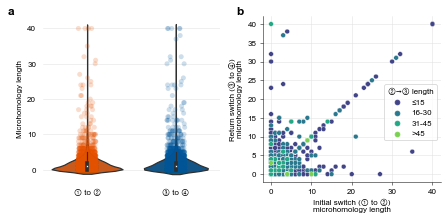

In [17]:
fpath = "/System/Library/Fonts/Supplemental/Arial Unicode.ttf"
prop = matplotlib.font_manager.FontProperties(fname=fpath)

fig, ax = plt.subplots(1, 2, figsize=(linewidth, linewidth/2))

sns.scatterplot(data=df,
                x="homology_12",
                y="homology_34",
                hue="len_23_bin",
                ax=ax[1],
                palette="viridis")

x_offset = [-0.2,-0.15]

ax[1].set_xlabel("Initial switch ({} to {})\nmicrohomology length".format(circled(1), circled(2)), font=prop)
ax[1].set_ylabel("Return switch ({} to {})\nmicrohomology length".format(circled(3), circled(4)), font=prop)

leg = ax[1].legend(loc="center right",
                   ncol=1,
                   prop=prop,
                   bbox_to_anchor=(1, 0.42))

leg.set_title("{}→{} length".format(circled(2), circled(3)),  prop = prop)

pal = ["#E65100", "#01579B"]

sns.violinplot(data=df_2,
            y="homs",
            x="label",
            ax=ax[0],
            palette=pal)

for artist in ax[0].lines:
    artist.set_zorder(10)
for artist in ax[0].findobj(PathCollection):
    artist.set_zorder(11)

sns.stripplot(data=df_2,
            y="homs",
            x="label",
            ax=ax[0],
            jitter=True,
            alpha=.2,
            palette=pal)

ax[0].set_xlabel("")

ax[0].set_ylabel("Microhomology length")

for label in ax[0].get_xticklabels():
    label.set_fontproperties(prop)

for n, a in enumerate(ax):
    a.text(x_offset[n], 1.01, string.ascii_lowercase[n], transform=a.transAxes, 
            size=12, weight='bold')
    a.yaxis.grid(color="#e0e0e0",
                 linewidth=border_width)
    if n == 1:
        a.xaxis.grid(color="#e0e0e0",
                    linewidth=border_width)
        sns.despine(ax=ax[n])
        a.tick_params(left=True, bottom=True,
                    axis="both",
                    length=3,
                    width=border_width)
    else:
        sns.despine(ax=ax[n], bottom=True, left=True)
        a.tick_params(left=False, bottom=False,
                    axis="both",
                    length=3,
                    width=border_width)
    a.set_axisbelow(True)

fig.tight_layout()

plt.savefig("microhomology.pdf",
            format="pdf",
            facecolor="white",
            bbox_inches="tight")

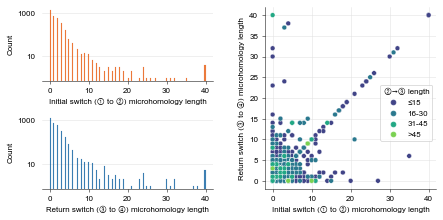

In [35]:
fig = plt.figure(figsize=(linewidth, linewidth/2))


gs=GridSpec(2,2)

ax1=fig.add_subplot(gs[0,0]) # First row, first column
ax2=fig.add_subplot(gs[1,0]) # First row, second column
ax3=fig.add_subplot(gs[:,1]) # First row, third column

ax = [ax1, ax2, ax3]


fpath = "/System/Library/Fonts/Supplemental/Arial Unicode.ttf"
prop = matplotlib.font_manager.FontProperties(fname=fpath)

#fig, ax = plt.subplots(1, 2, figsize=(linewidth, linewidth/2))

sns.scatterplot(data=df,
                x="homology_12",
                y="homology_34",
                hue="len_23_bin",
                ax=ax[2],
                palette="viridis")


ax[2].set_xlabel("Initial switch ({} to {}) microhomology length".format(circled(1), circled(2)), font=prop)
ax[2].set_ylabel("Return switch ({} to {}) microhomology length".format(circled(3), circled(4)), font=prop)

leg = ax[2].legend(loc="center right",
                   ncol=1,
                   prop=prop,
                   bbox_to_anchor=(1, 0.42))

leg.set_title("{}→{} length".format(circled(2), circled(3)),  prop = prop)

pal = ["#E65100", "#01579B"]

sns.histplot(data=df_2[df_2["label"] == "① to ②"],
            x="homs",
            ax=ax[0],
            color=pal[0],
            edgecolor=pal[0])

sns.histplot(data=df_2[df_2["label"] != "① to ②"],
            x="homs",
            ax=ax[1],
            color=pal[1],
            edgecolor=pal[1])


ax[0].set_xlabel("Count")
ax[0].set_xlabel("Initial switch ({} to {}) microhomology length".format(circled(1), circled(2)), font=prop)

ax[1].set_xlabel("Count")
ax[1].set_xlabel("Return switch ({} to {}) microhomology length".format(circled(3), circled(4)), font=prop)





for label in ax[0].get_xticklabels():
    label.set_fontproperties(prop)
for label in ax[1].get_xticklabels():
    label.set_fontproperties(prop)


ax[0].set_yscale("log")
ax[1].set_yscale("log")

#ax[0].set_yticks([0,0,10,100,1000,10000,100000])


for a in [ax[0], ax[1]]:
    for a2 in [a.xaxis, a.yaxis]:
        formatter = ScalarFormatter()
        formatter.set_scientific(False)
        a2.set_major_formatter(formatter)


x_offset = [-0.22,-0.22,-0.17]

for n, a in enumerate(ax):
    # a.text(x_offset[n], 1.01, string.ascii_lowercase[n], transform=a.transAxes, 
    #         size=12, weight='bold')
    a.yaxis.grid(color="#e0e0e0",
                 linewidth=border_width)
    if n == 2:
        a.xaxis.grid(color="#e0e0e0",
                    linewidth=border_width)
        sns.despine(ax=ax[n])
        a.tick_params(left=True, bottom=True,
                    axis="both",
                    length=3,
                    width=border_width)
    else:
        sns.despine(ax=ax[n], left=True)
        a.tick_params(left=False, 
                    axis="both",
                    length=3,
                    width=border_width)
    a.set_axisbelow(True)

fig.tight_layout()

plt.subplots_adjust(wspace=.3, hspace=.45)



# sns.set_style("ticks")    

plt.savefig("microhomology_length_hists.pdf",
            format="pdf",
            facecolor="white",
            bbox_inches="tight")

In [87]:
point_dic = {
    "1432, 3214": '①-④-③-②,\n③-②-①-④',
    "1324": '①-③-②-④',
    "3124, 1342": '③-①-②-④,\n①-③-④-②',
    "3142": '③-①-④-②'
}

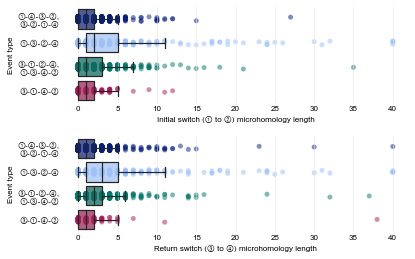

In [120]:
fig, ax = plt.subplots(2,1, figsize=(linewidth, linewidth/1.5))

cus_pal = ["#051e7f","#97bfff","#00796b","#ad1457"]

sns.stripplot(x="homology_12", y="event_type", data=df, ax=ax[0],
            palette=cus_pal,zorder=0, alpha=.5)
sns.boxplot(x="homology_12", y="event_type", data=df, ax=ax[0], showfliers=False,
            palette=cus_pal, zorder=50)

for patch in ax[0].artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .75))

sns.stripplot(x="homology_34", y="event_type", data=df, ax=ax[1],
            palette=cus_pal,zorder=0, alpha=.5)
sns.boxplot(x="homology_34", y="event_type", data=df, ax=ax[1], showfliers=False,
            palette=cus_pal)
for patch in ax[1].artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .75))
#x_offset = [-0.4,-0.7]



for n, a in enumerate(ax):
    # a.text(x_offset[n], 1.01, string.ascii_lowercase[n], transform=a.transAxes, 
    #         size=12, weight='bold')
    a.tick_params(axis='y', which='major', pad=-2)
    a.tick_params(axis='x', which='major', pad=-2)

    ax[n].set_xlabel("")
    ax[n].set_ylabel(y_labs[n])
    sns.despine(ax=ax[n], left=True, bottom=True)
    a.tick_params(axis="both",
                  which="both",
                  left=False, bottom=False)

    labels = [point_dic[item.get_text()] for item in a.get_yticklabels()]
    a.set_yticklabels(labels, font=prop)



ax[0].set_xlabel("Initial switch ({} to {}) microhomology length".format(circled(1), circled(2)), font=prop)
ax[1].set_xlabel("Return switch ({} to {}) microhomology length".format(circled(3), circled(4)), font=prop)

ax[0].set_ylabel("Event type")
ax[1].set_ylabel("Event type")

for a in ax:
    a.xaxis.grid(color="#e0e0e0",
                 linewidth=border_width)
    a.set_axisbelow(True)

plt.subplots_adjust(hspace=.35)


plt.savefig("microhomology_vs_event_type.pdf",
            format="pdf",
            facecolor="white",
            bbox_inches="tight")

In [133]:
from scipy import stats

et_groups = []

for et in set(df["event_type"]):
    et_groups.append(list(df[df["event_type"] == et]["homology_12"]))
a,b,c,d = et_groups
print("12_length ks test:", stats.kruskal(a,b,c,d))

et_groups = []

for et in set(df["event_type"]):
    et_groups.append(list(df[df["event_type"] == et]["homology_34"]))
a,b,c,d = et_groups
stats.kruskal(a,b,c,d)

print("34_length ks test:", stats.kruskal(a,b,c,d))

12_length ks test: KruskalResult(statistic=238.93167747562018, pvalue=1.6200512867101418e-51)
34_length ks test: KruskalResult(statistic=372.97200097522534, pvalue=1.5816011838997519e-80)


In [42]:
for i in range(6):
    print("1 to 2 homology length {}: {}".format(i,len(df[df["homology_12"] == i]) / len(df)))
    print("1 to 2 homology geq length {}: {}".format(i,len(df[df["homology_12"] > i]) / len(df)))
    print()

len(df[df["homology_12"].between(1,5)] ) / len(df)

1 to 2 homology length 0: 0.39080459770114945
1 to 2 homology geq length 0: 0.6091954022988506

1 to 2 homology length 1: 0.2044767090139141
1 to 2 homology geq length 1: 0.4047186932849365

1 to 2 homology length 2: 0.1820931639443436
1 to 2 homology geq length 2: 0.22262552934059285

1 to 2 homology length 3: 0.102843315184513
1 to 2 homology geq length 3: 0.11978221415607986

1 to 2 homology length 4: 0.05323653962492438
1 to 2 homology geq length 4: 0.06654567453115548

1 to 2 homology length 5: 0.019358741681790685
1 to 2 homology geq length 5: 0.047186932849364795



0.5620084694494858

In [43]:
for i in range(6):
    print("3 to 4 homology length {}: {}".format(i,len(df[df["homology_34"] == i]) / len(df)))
    print("3 to 4 homology geq length {}: {}".format(i,len(df[df["homology_34"] > i]) / len(df)))
    print()

len(df[df["homology_34"].between(1,5)] ) / len(df)

3 to 4 homology length 0: 0.3777979431336963
3 to 4 homology geq length 0: 0.6222020568663037

3 to 4 homology length 1: 0.21536600120992136
3 to 4 homology geq length 1: 0.4068360556563823

3 to 4 homology length 2: 0.18269812462189958
3 to 4 homology geq length 2: 0.22413793103448276

3 to 4 homology length 3: 0.10314579552329099
3 to 4 homology geq length 3: 0.12099213551119177

3 to 4 homology length 4: 0.049606775559588624
3 to 4 homology geq length 4: 0.07138535995160314

3 to 4 homology length 5: 0.024500907441016333
3 to 4 homology geq length 5: 0.04688445251058681



0.5753176043557169